In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Mounted at /gdrive
/gdrive


In [ ]:
%cd/gdrive/Shareddrives/BA840

/gdrive/Shareddrives/BA840


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ls

 database.csv  'Group Assignment.pdf'  'Project Ideas.gdoc'


In [ ]:
db = pd.read_csv("database.csv")
data = pd.read_csv("database.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
db.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [ ]:
dt = db.copy()

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Agency Name        638454 non-null  object
 1   Agency Type        638454 non-null  object
 2   City               638454 non-null  object
 3   State              638454 non-null  object
 4   Year               638454 non-null  int64 
 5   Month              638454 non-null  object
 6   Incident           638454 non-null  int64 
 7   Crime Type         638454 non-null  object
 8   Crime Solved       638454 non-null  object
 9   Victim Sex         638454 non-null  object
 10  Victim Age         638454 non-null  int64 
 11  Victim Race        638454 non-null  object
 12  Victim Ethnicity   638454 non-null  object
 13  Perpetrator Sex    638454 non-null  object
 14  Perpetrator Age    638454 non-null  object
 15  Perpetrator Race   638454 non-null  object
 16  Relationship       6

In [ ]:
dt.describe()

,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,0.123334,0.185224
std,9.927693,92.149821,41.628306,0.537733,0.585496
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,2004.000000,10.000000,42.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,10.000000,10.000000


In [ ]:
cs = dt[dt["Crime Solved"] == "Yes"]
cs.head()

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Acquaintance,Strangulation,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Acquaintance,Strangulation,0,0,FBI
5,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36,White,Acquaintance,Rifle,0,0,FBI
6,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Unknown,Male,27,Black,Wife,Knife,0,0,FBI


In [ ]:
cs['Perpetrator Age'] = cs['Perpetrator Age'].astype("int32")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cs.describe()

,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,448172.000000,448172.000000,448172.000000,448172.000000,448172.000000,448172.000000
mean,1995.630071,21.766726,34.008200,28.898726,0.132614,0.248884
std,9.995683,93.318677,32.806341,14.364530,0.576816,0.675383
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,20.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,26.000000,0.000000,0.000000
75%,2004.000000,7.000000,42.000000,36.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


In [ ]:
cs.groupby("Perpetrator Sex").mean()[["Perpetrator Age","Victim Age"]]

,Perpetrator Age,Victim Age
Perpetrator Sex,,
Female,31.932307,34.673856
Male,28.540735,33.928452
Unknown,0.000000,30.911565


In [ ]:
cs.groupby("Perpetrator Sex").count()[["Perpetrator Age"]]

,Perpetrator Age
Perpetrator Sex,
Female,48543
Male,399482
Unknown,147


In [ ]:
cs.groupby("Perpetrator Race").describe()[["Perpetrator Age","Victim Age"]]

Perpetrator Age             ... Victim Age       
                                        count       mean  ...        75%    max
Perpetrator Race                                          ...                  
Asian/Pacific Islander                 6026.0  30.724029  ...       41.0   99.0
Black                                214344.0  26.576895  ...       39.0  998.0
Native American/Alaska Native          3595.0  28.822531  ...       43.0  998.0
Unknown                                6049.0  14.919821  ...       40.0  998.0
White                                218158.0  31.518404  ...       44.0  998.0

[5 rows x 16 columns]

In [ ]:
cs.groupby("Relationship").count()[["Incident"]]

,Incident
Relationship,
Acquaintance,123852
Boyfriend,7288
Boyfriend/Girlfriend,1281
Brother,5496
Common-Law Husband,1947
Common-Law Wife,2470
Daughter,7487
Employee,380
Employer,509


In [ ]:
data = data[data['Crime Solved'] == 'Yes']
cols_to_drop += ['Crime Solved']

In [ ]:
data['Perpetrator Age'] = data['Perpetrator Age'].astype("int64")

In [ ]:
data['Perpetrator Age category'] = np.where(data['Perpetrator Age'] > 64, 'Elder', np.where(data['Perpetrator Age'] < 25, 'Young', 'Adult'))

In [ ]:
Y_columns = ['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category']
ignore_columns = ['Crime Solved']
cat_columns = []
num_columns = []

for col in data.columns.values:
    if col in Y_columns+ignore_columns:
        continue
    elif data[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]

In [ ]:
median_val = pd.Series()
for col in num_columns:
    if col not in cols_to_drop:
        median_val[col] = data[col].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
data = handle_missing_values(data, median_val)


In [ ]:
data.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
def handle_missing_values(data, median_val):
    df = data.copy()
    for col in df:
        if col in median_val.index.values:
            df[col] = df[col].fillna(median_val[col])
        else:
            df[col] = df[col].fillna("Missing value")
    
    return df

In [ ]:
categorical_features = cat_columns + ['Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Age category']
# categorical_features = categorical_features 
categorical_features_idx = [np.where(data.columns.values == col)[0][0] for col in categorical_features]

del cat_columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
data_encoded = data.copy()

categorical_names = {}
encoders = {}

# Use Label Encoder for categorical columns (including target column)
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])
    
    data_encoded[feature] = le.transform(data_encoded[feature])
    
    categorical_names[feature] = le.classes_
    encoders[feature] = le

In [ ]:
numerical_features = [c for c in data.columns.values if c not in categorical_features]

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

del num_columns

In [ ]:
def decode_dataset(data, encoders, numerical_features, categorical_features):
    df = data.copy()
    for feat in df.columns.values:
        if feat in numerical_features:
            df[feat] = encoders[feat].inverse_transform(np.array(df[feat]).reshape(-1, 1))
    for feat in categorical_features:
        df[feat] = encoders[feat].inverse_transform(df[feat].astype(int))
    return df

In [ ]:
decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator Age category
0,1.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,Male,14.0,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI,Young
1,2.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,Male,43.0,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
3,4.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,Male,43.0,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI,Adult
5,6.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,May,1.0,Murder or Manslaughter,Male,30.0,White,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0.0,0.0,FBI,Adult
6,7.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,May,2.0,Murder or Manslaughter,Female,42.0,Native American/Alaska Native,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0.0,0.0,FBI,Adult


In [ ]:
data_perp_sex = data_encoded.drop(['Perpetrator Race','Perpetrator Age category','Perpetrator Age'], axis=1)

In [ ]:
privileged_sex = np.where(categorical_names['Victim Sex'] == 'Male')[0]
privileged_race = np.where(categorical_names['Victim Race'] == 'White')[0]

In [ ]:
pip install aif360

In [ ]:
from aif360.datasets import StandardDataset


In [ ]:
data_orig_sex = StandardDataset(data_perp_sex, 
                               label_name='Perpetrator Sex', 
                               favorable_classes=[1], 
                               protected_attribute_names=['Victim Sex', 'Victim Race'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [ ]:
def meta_data(dataset):
    # print out some labels, names, etc.
    display(Markdown("#### Dataset shape"))
    print(dataset.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(dataset.favorable_label, dataset.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(dataset.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(dataset.privileged_protected_attributes, dataset.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(dataset.feature_names)

In [ ]:
from IPython.display import Markdown, display

In [ ]:
meta_data(data_orig_sex)

#### Dataset shape

(448172, 20)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['Victim Sex', 'Victim Race']


#### Privileged and unprivileged protected attribute values

[array([1.]), array([4.])] [array([0., 2.]), array([0., 1., 2., 3.])]


#### Dataset feature names

['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count', 'Record Source']


In [ ]:
np.random.seed(42)

data_orig_sex_train, data_orig_sex_test = data_orig_sex.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_train.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Perpetrator Sex :",data_orig_sex_test.features.shape)

#### Train Dataset shape

Perpetrator Sex : (313720, 20)


#### Test Dataset shape

Perpetrator Sex : (134452, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_orig_sex = RandomForestClassifier().fit(data_orig_sex_train.features, 
                     data_orig_sex_train.labels.ravel(), 
                     sample_weight=data_orig_sex_train.instance_weights)

In [ ]:
X_test_sex = data_orig_sex_test.features
y_test_sex = data_orig_sex_test.labels.ravel()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

#### Accuracy of the model :

0.9340880016660221


#### F1 score of the model :

0.9641197143181044


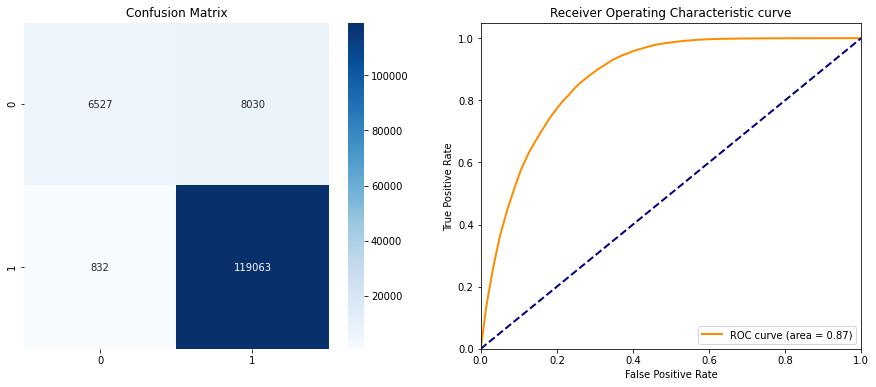

In [ ]:
plot_model_performance(rf_orig_sex, data_orig_sex_test.features, y_test_sex)


In [ ]:
## Fairness

In [101]:
import random

In [106]:
random.randint(1,5)

3